In [32]:
import SimpleITK as sitk
import glob
import pandas as pd
from PIL import Image
import gui
from myshow import *

In [ ]:
imgPath

In [ ]:
#01013843 ww,wl = 380,80

In [14]:
pwd

'/home/ubuntu/gcubme4/Workspace/JW_Seo/DVT_detection/blood_vessel/code'

In [40]:
T1_WINDOW_LEVEL= (380,80)
dcm_list=sorted(glob.glob('../../local/data/dvt/01013843/*.dcm'))

In [22]:
print(len(dcm_list))

245


In [63]:
img_T1 = sitk.ReadImage(dcm_list)

# Rescale the intensities and map them to [0,255], these are the default values for the output
# We will use this image to display the results of segmentation
img_T1_255 = sitk.Cast(sitk.IntensityWindowing(img_T1, 
                                               windowMinimum=T1_WINDOW_LEVEL[1]-T1_WINDOW_LEVEL[0]/2.0, 
                                               windowMaximum=T1_WINDOW_LEVEL[1]+T1_WINDOW_LEVEL[0]/2.0), 
                       sitk.sitkUInt8)

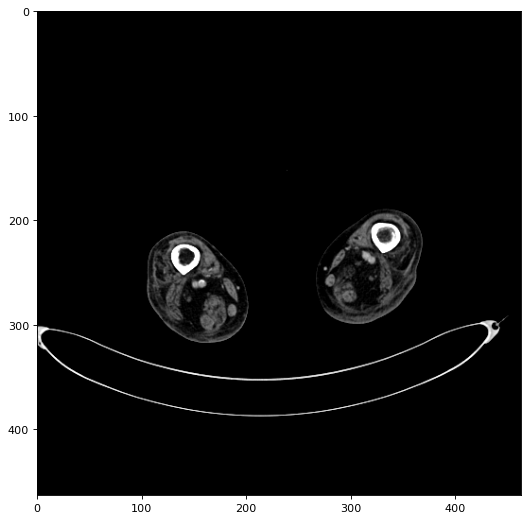

In [64]:
myshow(img_T1_255)

In [65]:
help(point_acquisition_interface.set_point_indexes)

Help on method set_point_indexes in module gui:

set_point_indexes(point_index_data) method of gui.PointDataAquisition instance



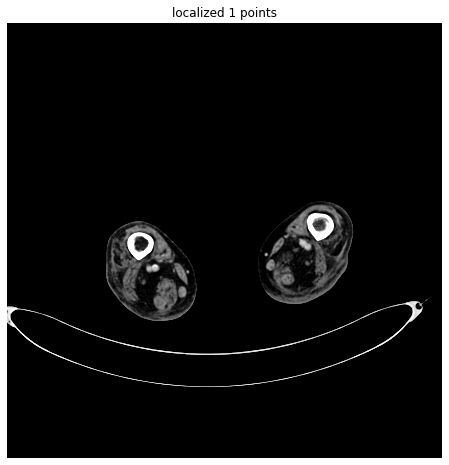

In [109]:
point_acquisition_interface = gui.PointDataAquisition(img_T1, window_level=(380,80))

#preselected seed point in the left ventricle  
point_acquisition_interface.set_point_indexes([(315,205,67)])

(245, 512, 512)


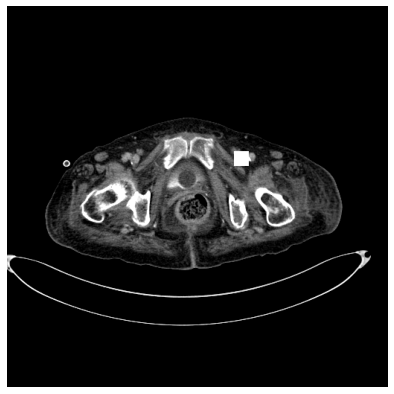

In [84]:
sample_img_T1_255 = sitk.GetArrayFromImage(img_T1_255)
print(sample_img_T1_255.shape)

sample_img_67 = sample_img_T1_255[67,:,:]
sample_img_67[195:215,305:325] = 255

plt.figure(figsize=(7,7))
plt.imshow(sample_img_67, cmap='gray')
plt.axis('off')
plt.show()
# (319,250,67)

In [110]:
initial_seed_point_indexes = point_acquisition_interface.get_point_indexes()

In [68]:
print(initial_seed_point_indexes)

[(319, 250, 67)]


In [139]:
seg_explicit_thresholds = sitk.ConnectedThreshold(img_T1, seedList=initial_seed_point_indexes, lower=5, upper=80)
# Overlay the segmentation onto the T1 image
# gui.MultiImageDisplay(image_list = [sitk.LabelOverlay(img_T1_255, seg_explicit_thresholds)],                   
#                       title_list = ['connected threshold result'])

In [130]:
print(seg_explicit_thresholds.GetSize(), img_T1_255.GetSize())

(512, 512, 245) (512, 512, 245)


In [140]:
_seg_explicit_thresholds = sitk.GetArrayFromImage(seg_explicit_thresholds)
_img_T1_255 = sitk.GetArrayFromImage(img_T1_255)

print(_img_T1_255.shape, _img_T1_255.min(), _img_T1_255.max(), _img_T1_255.dtype)
print(_seg_explicit_thresholds.shape, _seg_explicit_thresholds.min(), _seg_explicit_thresholds.max(), _seg_explicit_thresholds.dtype)

(245, 512, 512) 0 255 uint8
(245, 512, 512) 0 1 uint8


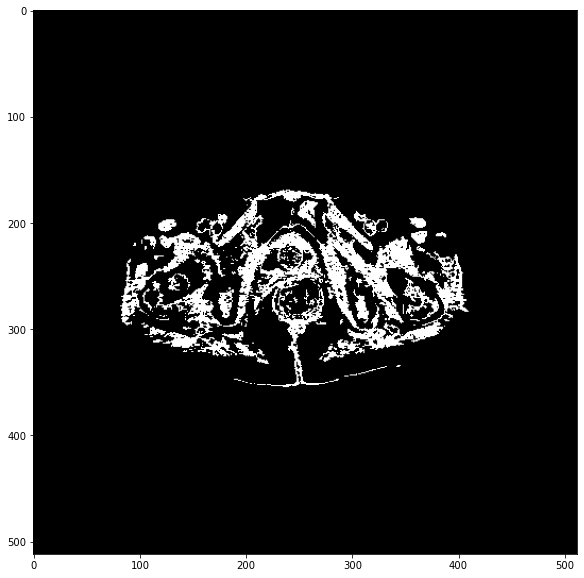

In [143]:
plt.figure(figsize=(10,10))
# plt.imshow(_img_T1_255[67], cmap='gray')
# plt.imshow(_seg_explicit_thresholds[67], cmap='Reds', alpha=.5)
plt.imshow(_seg_explicit_thresholds[67], cmap='gray')
plt.show()

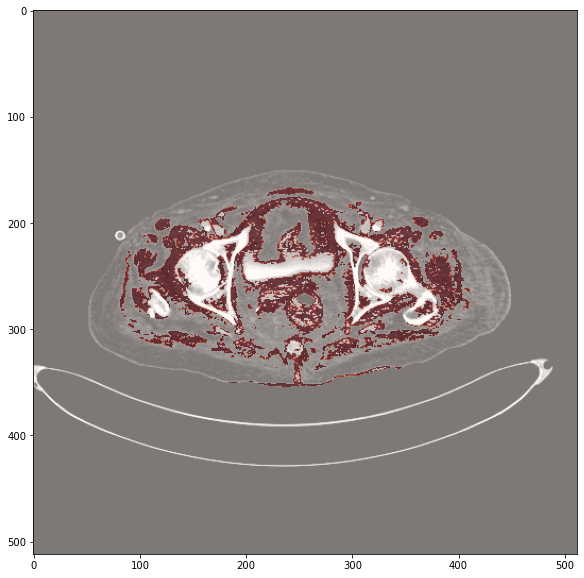

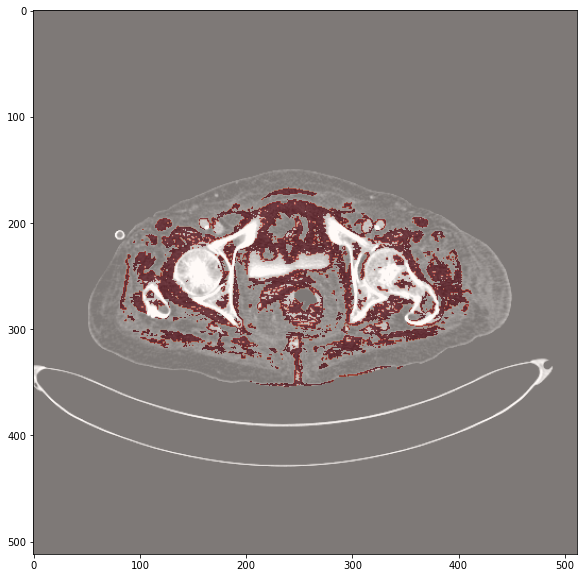

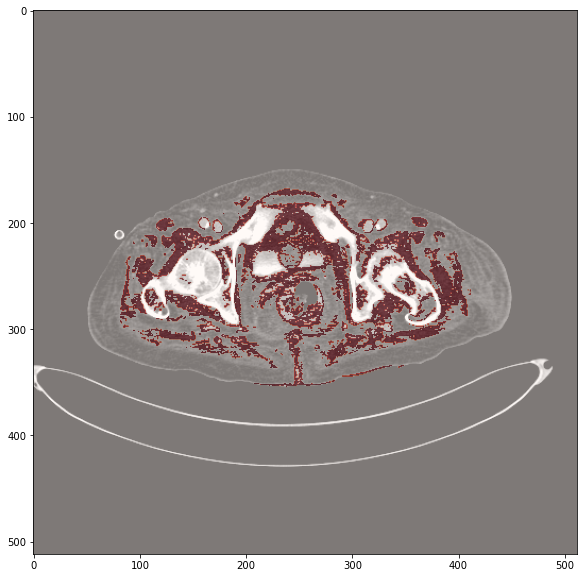

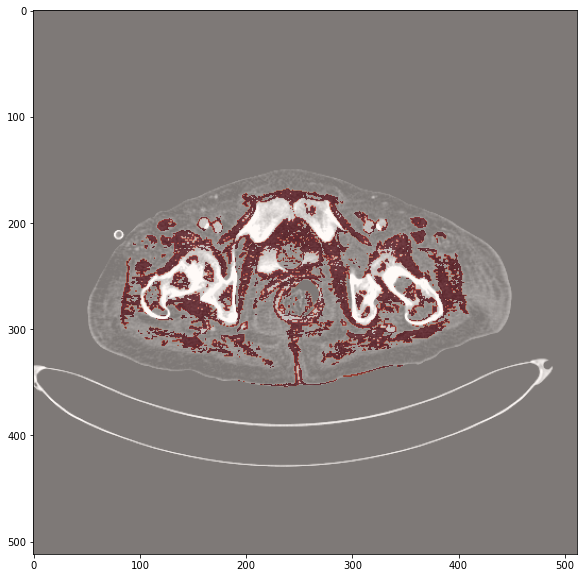

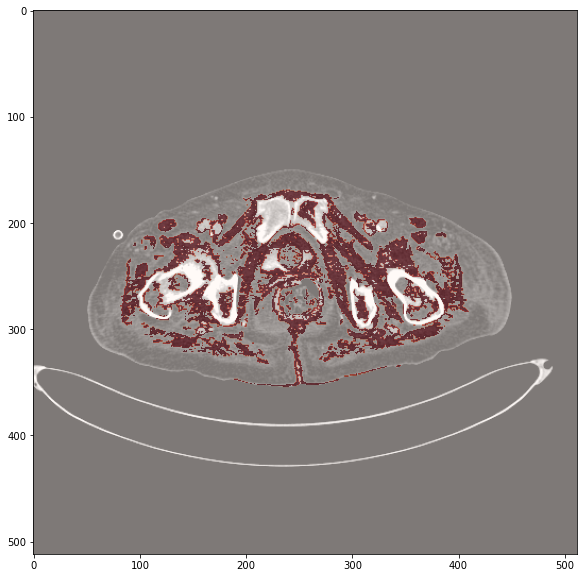

In [142]:
for i in range(63,68):
    plt.figure(figsize=(10,10))
    plt.imshow(_img_T1_255[i], cmap='gray')
    plt.imshow(_seg_explicit_thresholds[i], cmap='Reds', alpha=.5)
    plt.show()

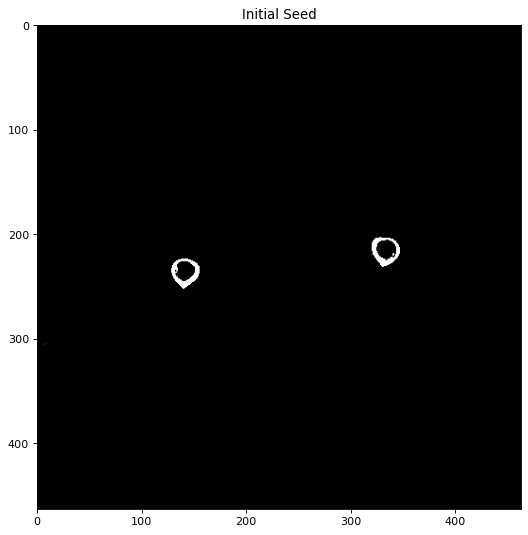

In [33]:
seed = (250,250,0)
seg = sitk.Image(img_T1.GetSize(), sitk.sitkUInt8)
seg.CopyInformation(img_T1)
seg[seed] = 1
# seg = sitk.BinaryDilate(seg, 3)
myshow(sitk.LabelOverlay(img_T1_255, seg), "Initial Seed")